- mnist를 DNN으로 구현 :  https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input 
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print([0, 0])
print(data[0, 1:].reshape(28,28))

(785,)
[0, 0]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 19

In [4]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [5]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

5.0

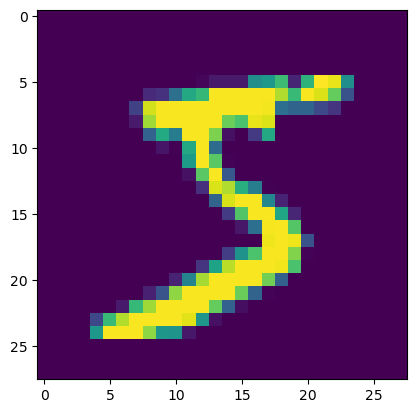

In [6]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

# 1. 데이터 생성 & 전처리

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

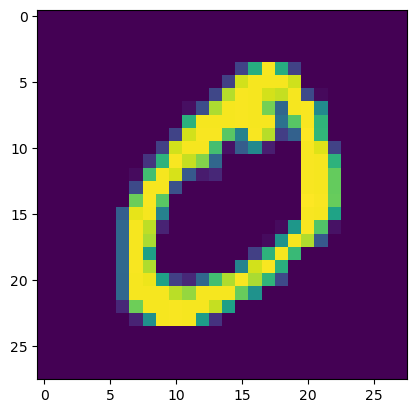

In [9]:
plt.plot(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [10]:
Y_train[1]

0

In [11]:
# 훈련섹(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
# 검증셋을(만개) 하기위해 X_train, Y_train 을 다시 재정의
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [13]:
# 훈련시(학습시 사용), 검증셋(fit에서 사용), 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [14]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정 (255.0으로 나눠)
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [20]:
# 훈련셋(5만개)과 검증셋 (만개) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700) # 비복원 추출은 자동 중복값제외
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

5


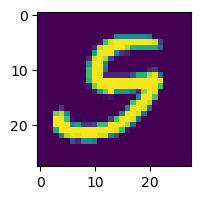

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(-1, 28))
print(Y_train[0])
plt.show()

In [26]:
# 종속변수 전처리 : 원핫인코딩 (to_categorical(넘파이배열), pd.get_dummies(데이터프레임))
print('원핫인코딩 전 shape :' ,Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 후 shape :' ,Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape : (700, 10) (300, 10) (10000, 10)


In [27]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


## 2. 모델구성하기

In [29]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 1570      
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [32]:
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 33ms/step - loss: 2.3143 - accuracy: 0.0943 - val_loss: 2.3040 - val_accuracy: 0.0667
Epoch 2/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.3090 - accuracy: 0.0614 - val_loss: 2.3006 - val_accuracy: 0.0567
Epoch 3/1200
7/7 [==============================] - 0s 14ms/step - loss: 2.3045 - accuracy: 0.0443 - val_loss: 2.2976 - val_accuracy: 0.0567
Epoch 4/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.3004 - accuracy: 0.0400 - val_loss: 2.2942 - val_accuracy: 0.0533
Epoch 5/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2964 - accuracy: 0.0414 - val_loss: 2.2902 - val_accuracy: 0.0600
Epoch 6/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2923 - accuracy: 0.0429 - val_loss: 2.2857 - val_accuracy: 0.0667
Epoch 7/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2880 - accuracy: 0.0514 - val_loss: 2.2812 - val_accuracy: 0.0600
Epoch 8/1200
7/7 

7/7 [==============================] - 0s 8ms/step - loss: 2.0353 - accuracy: 0.2329 - val_loss: 2.0529 - val_accuracy: 0.2300
Epoch 118/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.0336 - accuracy: 0.2300 - val_loss: 2.0512 - val_accuracy: 0.2267
Epoch 119/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.0318 - accuracy: 0.2300 - val_loss: 2.0495 - val_accuracy: 0.2300
Epoch 120/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0300 - accuracy: 0.2343 - val_loss: 2.0480 - val_accuracy: 0.2300
Epoch 121/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0284 - accuracy: 0.2386 - val_loss: 2.0464 - val_accuracy: 0.2300
Epoch 122/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0265 - accuracy: 0.2357 - val_loss: 2.0448 - val_accuracy: 0.2367
Epoch 123/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0247 - accuracy: 0.2400 - val_loss: 2.0431 - val_accuracy: 0.2333
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.9070 - accuracy: 0.3129 - val_loss: 1.9288 - val_accuracy: 0.3167
Epoch 176/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9044 - accuracy: 0.3129 - val_loss: 1.9260 - val_accuracy: 0.3200
Epoch 177/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9018 - accuracy: 0.3129 - val_loss: 1.9234 - val_accuracy: 0.3200
Epoch 178/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8988 - accuracy: 0.3129 - val_loss: 1.9207 - val_accuracy: 0.3200
Epoch 179/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.8962 - accuracy: 0.3143 - val_loss: 1.9179 - val_accuracy: 0.3200
Epoch 180/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8935 - accuracy: 0.3186 - val_loss: 1.9151 - val_accuracy: 0.3167
Epoch 181/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8909 - accuracy: 0.3171 - val_loss: 1.9126 - val_accuracy: 0.3133
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7853 - accuracy: 0.3286 - val_loss: 1.8085 - val_accuracy: 0.3533
Epoch 234/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7837 - accuracy: 0.3286 - val_loss: 1.8071 - val_accuracy: 0.3567
Epoch 235/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.7824 - accuracy: 0.3271 - val_loss: 1.8058 - val_accuracy: 0.3567
Epoch 236/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.7809 - accuracy: 0.3271 - val_loss: 1.8045 - val_accuracy: 0.3567
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.7795 - accuracy: 0.3271 - val_loss: 1.8033 - val_accuracy: 0.3600
Epoch 238/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.7782 - accuracy: 0.3257 - val_loss: 1.8020 - val_accuracy: 0.3600
Epoch 239/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.7767 - accuracy: 0.3271 - val_loss: 1.8009 - val_accuracy: 0.3600
Epoch 

Epoch 291/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7203 - accuracy: 0.3429 - val_loss: 1.7542 - val_accuracy: 0.3700
Epoch 292/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7193 - accuracy: 0.3414 - val_loss: 1.7535 - val_accuracy: 0.3700
Epoch 293/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7187 - accuracy: 0.3429 - val_loss: 1.7527 - val_accuracy: 0.3700
Epoch 294/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7177 - accuracy: 0.3414 - val_loss: 1.7520 - val_accuracy: 0.3700
Epoch 295/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7168 - accuracy: 0.3429 - val_loss: 1.7514 - val_accuracy: 0.3700
Epoch 296/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7159 - accuracy: 0.3429 - val_loss: 1.7507 - val_accuracy: 0.3700
Epoch 297/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7151 - accuracy: 0.3429 - val_loss: 1.7500 - val_accuracy: 0.3700
Epoch 

Epoch 349/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6750 - accuracy: 0.3686 - val_loss: 1.7206 - val_accuracy: 0.3833
Epoch 350/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6744 - accuracy: 0.3643 - val_loss: 1.7200 - val_accuracy: 0.3833
Epoch 351/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6738 - accuracy: 0.3686 - val_loss: 1.7195 - val_accuracy: 0.3833
Epoch 352/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6729 - accuracy: 0.3657 - val_loss: 1.7188 - val_accuracy: 0.3867
Epoch 353/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6723 - accuracy: 0.3700 - val_loss: 1.7184 - val_accuracy: 0.3867
Epoch 354/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6715 - accuracy: 0.3714 - val_loss: 1.7181 - val_accuracy: 0.3867
Epoch 355/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6711 - accuracy: 0.3714 - val_loss: 1.7176 - val_accuracy: 0.3867
Epoch 

Epoch 407/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.6381 - accuracy: 0.3786 - val_loss: 1.6933 - val_accuracy: 0.4033
Epoch 408/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6376 - accuracy: 0.3786 - val_loss: 1.6930 - val_accuracy: 0.4033
Epoch 409/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6368 - accuracy: 0.3771 - val_loss: 1.6927 - val_accuracy: 0.3967
Epoch 410/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6362 - accuracy: 0.3771 - val_loss: 1.6922 - val_accuracy: 0.4000
Epoch 411/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.6354 - accuracy: 0.3771 - val_loss: 1.6916 - val_accuracy: 0.4033
Epoch 412/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6347 - accuracy: 0.3771 - val_loss: 1.6910 - val_accuracy: 0.4067
Epoch 413/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.6342 - accuracy: 0.3757 - val_loss: 1.6906 - val_accuracy: 0.4067
Epoch 

Epoch 465/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6013 - accuracy: 0.3957 - val_loss: 1.6640 - val_accuracy: 0.4300
Epoch 466/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.6009 - accuracy: 0.3971 - val_loss: 1.6634 - val_accuracy: 0.4300
Epoch 467/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6001 - accuracy: 0.3829 - val_loss: 1.6628 - val_accuracy: 0.4300
Epoch 468/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5995 - accuracy: 0.3857 - val_loss: 1.6620 - val_accuracy: 0.4300
Epoch 469/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5989 - accuracy: 0.3757 - val_loss: 1.6613 - val_accuracy: 0.4300
Epoch 470/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5982 - accuracy: 0.3971 - val_loss: 1.6605 - val_accuracy: 0.4033
Epoch 471/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5975 - accuracy: 0.3943 - val_loss: 1.6599 - val_accuracy: 0.4000
Epoch 

Epoch 523/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5632 - accuracy: 0.4029 - val_loss: 1.6298 - val_accuracy: 0.4100
Epoch 524/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5623 - accuracy: 0.4043 - val_loss: 1.6293 - val_accuracy: 0.4100
Epoch 525/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5618 - accuracy: 0.4057 - val_loss: 1.6289 - val_accuracy: 0.4100
Epoch 526/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5613 - accuracy: 0.4043 - val_loss: 1.6286 - val_accuracy: 0.4133
Epoch 527/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5607 - accuracy: 0.4057 - val_loss: 1.6281 - val_accuracy: 0.4133
Epoch 528/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5600 - accuracy: 0.4057 - val_loss: 1.6276 - val_accuracy: 0.4133
Epoch 529/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5594 - accuracy: 0.4043 - val_loss: 1.6272 - val_accuracy: 0.4133
Epoch 

Epoch 581/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5291 - accuracy: 0.4143 - val_loss: 1.6057 - val_accuracy: 0.4233
Epoch 582/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5286 - accuracy: 0.4171 - val_loss: 1.6054 - val_accuracy: 0.4233
Epoch 583/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5280 - accuracy: 0.4157 - val_loss: 1.6049 - val_accuracy: 0.4233
Epoch 584/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5274 - accuracy: 0.4171 - val_loss: 1.6045 - val_accuracy: 0.4233
Epoch 585/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5267 - accuracy: 0.4171 - val_loss: 1.6042 - val_accuracy: 0.4233
Epoch 586/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5261 - accuracy: 0.4171 - val_loss: 1.6039 - val_accuracy: 0.4233
Epoch 587/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5256 - accuracy: 0.4171 - val_loss: 1.6036 - val_accuracy: 0.4233
Epoch 

Epoch 639/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4977 - accuracy: 0.4400 - val_loss: 1.5856 - val_accuracy: 0.4267
Epoch 640/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4973 - accuracy: 0.4357 - val_loss: 1.5854 - val_accuracy: 0.4267
Epoch 641/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4969 - accuracy: 0.4400 - val_loss: 1.5852 - val_accuracy: 0.4267
Epoch 642/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4963 - accuracy: 0.4386 - val_loss: 1.5847 - val_accuracy: 0.4300
Epoch 643/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4958 - accuracy: 0.4386 - val_loss: 1.5844 - val_accuracy: 0.4300
Epoch 644/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4956 - accuracy: 0.4386 - val_loss: 1.5839 - val_accuracy: 0.4300
Epoch 645/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4948 - accuracy: 0.4414 - val_loss: 1.5836 - val_accuracy: 0.4300
Epoch 

Epoch 697/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4712 - accuracy: 0.4514 - val_loss: 1.5693 - val_accuracy: 0.4333
Epoch 698/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4706 - accuracy: 0.4500 - val_loss: 1.5689 - val_accuracy: 0.4333
Epoch 699/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4704 - accuracy: 0.4514 - val_loss: 1.5685 - val_accuracy: 0.4333
Epoch 700/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4698 - accuracy: 0.4529 - val_loss: 1.5685 - val_accuracy: 0.4367
Epoch 701/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4694 - accuracy: 0.4529 - val_loss: 1.5680 - val_accuracy: 0.4367
Epoch 702/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4689 - accuracy: 0.4529 - val_loss: 1.5680 - val_accuracy: 0.4433
Epoch 703/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4686 - accuracy: 0.4514 - val_loss: 1.5676 - val_accuracy: 0.4367
Epoch 

Epoch 755/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4473 - accuracy: 0.4586 - val_loss: 1.5576 - val_accuracy: 0.4433
Epoch 756/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4470 - accuracy: 0.4571 - val_loss: 1.5574 - val_accuracy: 0.4433
Epoch 757/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4464 - accuracy: 0.4600 - val_loss: 1.5572 - val_accuracy: 0.4433
Epoch 758/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4460 - accuracy: 0.4571 - val_loss: 1.5570 - val_accuracy: 0.4433
Epoch 759/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4456 - accuracy: 0.4586 - val_loss: 1.5569 - val_accuracy: 0.4433
Epoch 760/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4453 - accuracy: 0.4600 - val_loss: 1.5569 - val_accuracy: 0.4433
Epoch 761/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4448 - accuracy: 0.4586 - val_loss: 1.5569 - val_accuracy: 0.4433
Epoch 

Epoch 813/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4234 - accuracy: 0.4614 - val_loss: 1.5473 - val_accuracy: 0.4500
Epoch 814/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4227 - accuracy: 0.4629 - val_loss: 1.5469 - val_accuracy: 0.4500
Epoch 815/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4224 - accuracy: 0.4643 - val_loss: 1.5469 - val_accuracy: 0.4500
Epoch 816/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4220 - accuracy: 0.4643 - val_loss: 1.5466 - val_accuracy: 0.4500
Epoch 817/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.4215 - accuracy: 0.4600 - val_loss: 1.5463 - val_accuracy: 0.4500
Epoch 818/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4210 - accuracy: 0.4629 - val_loss: 1.5462 - val_accuracy: 0.4500
Epoch 819/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4206 - accuracy: 0.4629 - val_loss: 1.5459 - val_accuracy: 0.4500
Epoch 

Epoch 871/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3997 - accuracy: 0.4757 - val_loss: 1.5357 - val_accuracy: 0.4667
Epoch 872/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3993 - accuracy: 0.4757 - val_loss: 1.5356 - val_accuracy: 0.4667
Epoch 873/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3989 - accuracy: 0.4757 - val_loss: 1.5352 - val_accuracy: 0.4667
Epoch 874/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3987 - accuracy: 0.4771 - val_loss: 1.5346 - val_accuracy: 0.4667
Epoch 875/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3982 - accuracy: 0.4771 - val_loss: 1.5346 - val_accuracy: 0.4667
Epoch 876/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3978 - accuracy: 0.4786 - val_loss: 1.5346 - val_accuracy: 0.4667
Epoch 877/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3975 - accuracy: 0.4757 - val_loss: 1.5344 - val_accuracy: 0.4667
Epoch 

Epoch 929/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3782 - accuracy: 0.4857 - val_loss: 1.5253 - val_accuracy: 0.4667
Epoch 930/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3779 - accuracy: 0.4857 - val_loss: 1.5253 - val_accuracy: 0.4667
Epoch 931/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3774 - accuracy: 0.4857 - val_loss: 1.5251 - val_accuracy: 0.4667
Epoch 932/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3772 - accuracy: 0.4857 - val_loss: 1.5250 - val_accuracy: 0.4667
Epoch 933/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3768 - accuracy: 0.4871 - val_loss: 1.5248 - val_accuracy: 0.4667
Epoch 934/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3764 - accuracy: 0.4843 - val_loss: 1.5247 - val_accuracy: 0.4667
Epoch 935/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3764 - accuracy: 0.4886 - val_loss: 1.5244 - val_accuracy: 0.4667
Epoch 

Epoch 987/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3578 - accuracy: 0.5029 - val_loss: 1.5186 - val_accuracy: 0.4633
Epoch 988/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3575 - accuracy: 0.5000 - val_loss: 1.5184 - val_accuracy: 0.4667
Epoch 989/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3572 - accuracy: 0.5057 - val_loss: 1.5185 - val_accuracy: 0.4600
Epoch 990/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3569 - accuracy: 0.5014 - val_loss: 1.5187 - val_accuracy: 0.4567
Epoch 991/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3564 - accuracy: 0.5029 - val_loss: 1.5189 - val_accuracy: 0.4567
Epoch 992/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3560 - accuracy: 0.5014 - val_loss: 1.5190 - val_accuracy: 0.4533
Epoch 993/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3557 - accuracy: 0.5000 - val_loss: 1.5189 - val_accuracy: 0.4533
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 1.3197 - accuracy: 0.4971 - val_loss: 1.5101 - val_accuracy: 0.4533
Epoch 1102/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3195 - accuracy: 0.4957 - val_loss: 1.5101 - val_accuracy: 0.4533
Epoch 1103/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3190 - accuracy: 0.4971 - val_loss: 1.5102 - val_accuracy: 0.4500
Epoch 1104/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3188 - accuracy: 0.4986 - val_loss: 1.5099 - val_accuracy: 0.4567
Epoch 1105/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3185 - accuracy: 0.4957 - val_loss: 1.5095 - val_accuracy: 0.4567
Epoch 1106/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3181 - accuracy: 0.4957 - val_loss: 1.5095 - val_accuracy: 0.4567
Epoch 1107/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3179 - accuracy: 0.5000 - val_loss: 1.5096 - val_accuracy: 0.4533
Epoch 1108/1200

### 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보 (추가)
- 레이어 층 늘리기
- 활성화 함수 : 은닉층에 주로 relu계열 (elu ... )
- optimizer, epoch 등을 조정